<a href="https://colab.research.google.com/github/shivasaketh333/AIML_25_B15/blob/main/labfile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
#import nbconvert #recode the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train = pd.read_csv("titanic_train.csv") # Reload the original training dataset
test  = pd.read_csv("titanic_test.csv")
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
d=train.describe(percentiles=[.25,.5])
d

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Text(0, 0.5, 'Count')

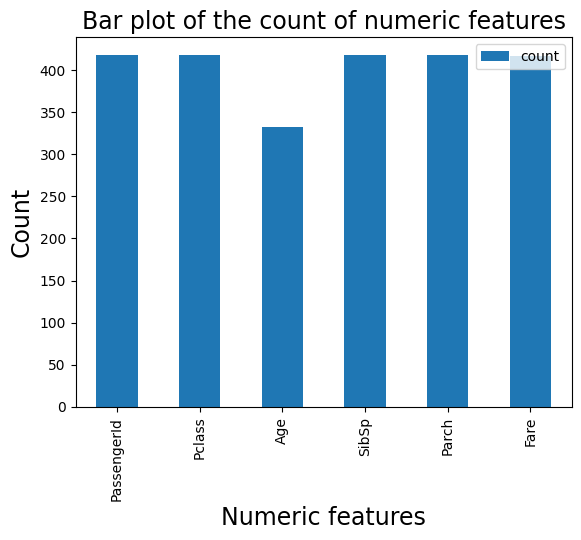

In [5]:
dT=d.T
dT.plot.bar(y='count')
plt.title("Bar plot of the count of numeric features",
          fontsize=17)
plt.xlabel("Numeric features",fontsize=17)
plt.ylabel("Count",fontsize=17)

<Axes: xlabel='Pclass', ylabel='count'>

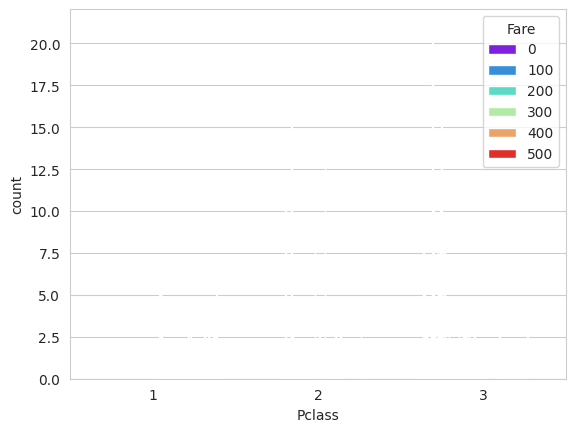

In [29]:
sns.set_style('whitegrid')
sns.countplot(x='Pclass',hue='Fare',data=train,
              palette='rainbow')

<Axes: xlabel='Pclass', ylabel='count'>

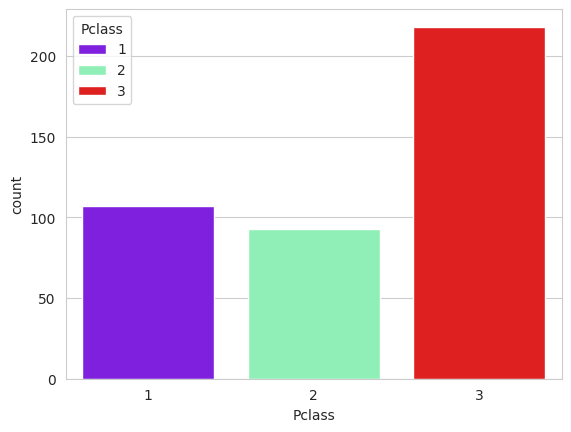

In [32]:
sns.set_style('whitegrid')
sns.countplot(x='Pclass',hue='Pclass',data=train,palette='rainbow')

In [35]:
f_class_Pclass=train.groupby('Pclass')['Pclass'].mean()
f_class_Pclass = pd.DataFrame(f_class_Pclass)
f_class_Pclass


,Pclass
Pclass,
1,1.0
2,2.0
3,3.0


<Axes: xlabel='Pclass', ylabel='count'>

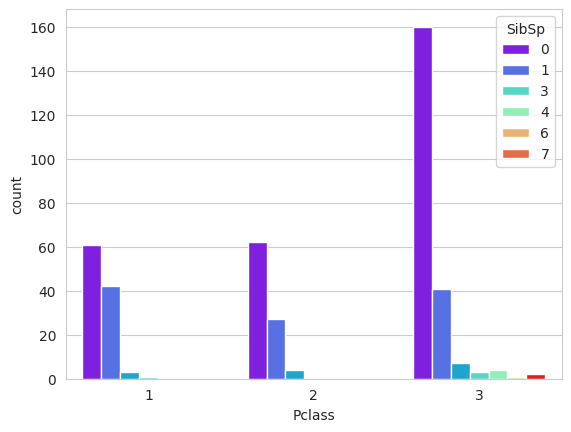

In [36]:
sns.set_style('whitegrid')
sns.countplot(x='Pclass',hue='SibSp',data=train,palette='rainbow')

Text(0.5, 1.0, 'Agewise histogram of the passengers')

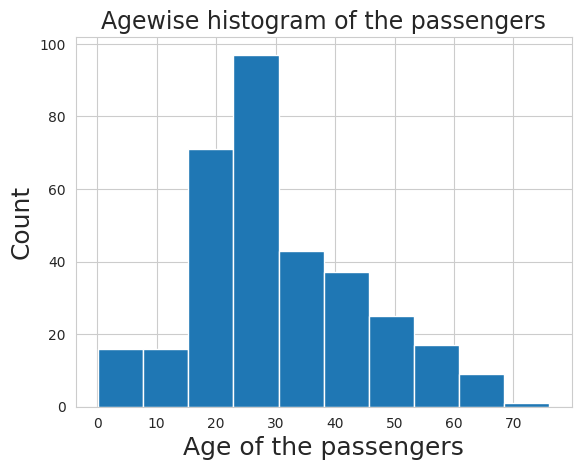

In [37]:
train['Age'].hist()
plt.xlabel("Age of the passengers",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.title("Agewise histogram of the passengers",fontsize=17)
#train['Age'].hist(bins=30,color='darkred',alpha=0.7,figsize=(10,6))

<ipython-input-38-2a1e3ee6c4a4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')


<Axes: xlabel='Passenger Class', ylabel='Age'>

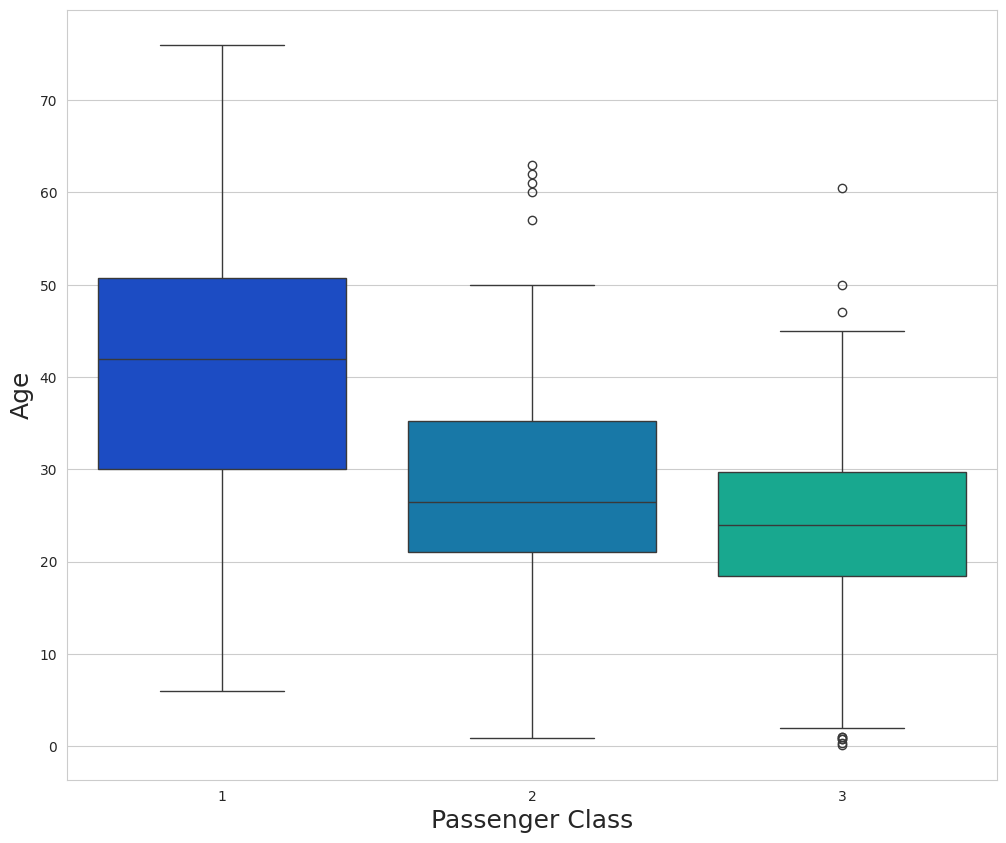

In [38]:
plt.figure(figsize=(12, 10))
plt.xlabel("Passenger Class",fontsize=18)
plt.ylabel("Age",fontsize=18)
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

Text(0.5, 0, 'Passenger class')

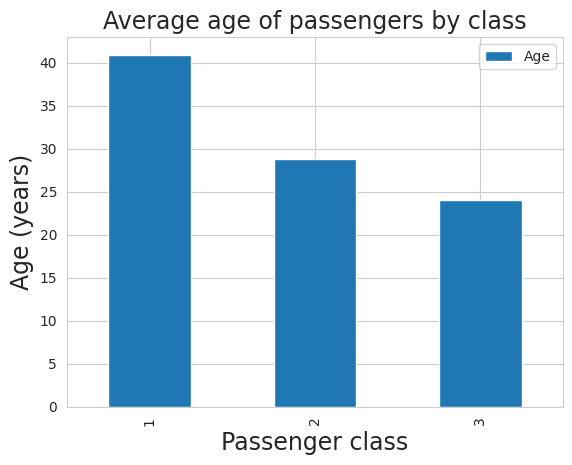

In [39]:
f_class_Age=train.groupby('Pclass')['Age'].mean()
f_class_Age = pd.DataFrame(f_class_Age)

f_class_Age.plot.bar(y='Age')
plt.title("Average age of passengers by class",fontsize=17)
plt.ylabel("Age (years)", fontsize=17)
plt.xlabel("Passenger class", fontsize=17)

In [40]:
a=list(f_class_Age['Age'])

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return a[0]
        elif Pclass == 2:
            return a[1]
        else:
            return a[2]
    else:
        return Age

<ipython-input-40-d85aaf299859>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
<ipython-input-40-d85aaf299859>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


Text(0.5, 1.0, 'Bar plot of numeric features')

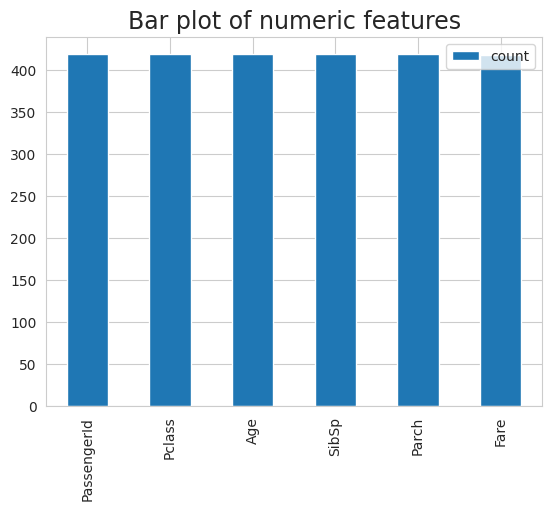

In [41]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
d=train.describe()

dT=d.T
dT.plot.bar(y='count')
plt.title("Bar plot of numeric features",fontsize=17)

In [42]:
train.drop('Cabin',axis=1,inplace=True)
train.dropna(inplace=True)
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [43]:
train.drop(['PassengerId','Name','Ticket'],axis=1,
           inplace=True)
train.dropna(inplace=True)
train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [44]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [45]:
train.drop(['Sex','Embarked'],axis=1,inplace=True)
train = pd.concat([train,sex,embark],axis=1)
train.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,True,True,False
1,3,47.0,1,0,7.0000,False,False,True
2,2,62.0,0,0,9.6875,True,True,False
3,3,27.0,0,0,8.6625,True,False,True
4,3,22.0,1,1,12.2875,False,False,True


In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    train.drop('Pclass',axis=1),train['Pclass'],
    test_size=0.20,random_state=111)

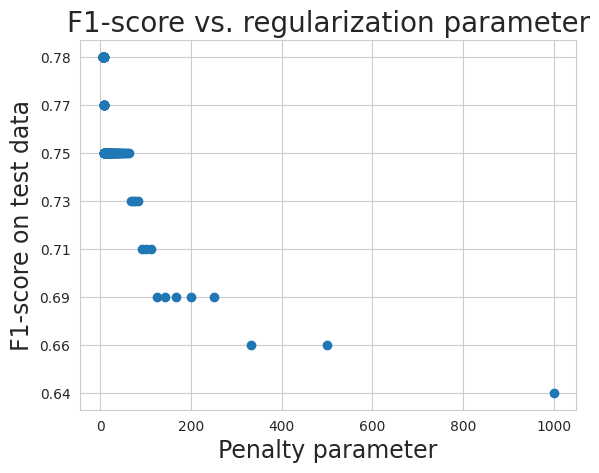

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
nsimu=201
penalty=[0]*nsimu
logmodel=[0]*nsimu
predictions =[0]*nsimu
class_report = [0]*nsimu
f1=[0]*nsimu

for i in range(1,nsimu):
        logmodel[i] =(LogisticRegression(C=i/1000,tol=1e-4,
                                         max_iter=int(1e6),
                                         n_jobs=4))
        logmodel[i].fit(X_train,y_train)
        predictions[i] = logmodel[i].predict(X_test)
        class_report[i] = classification_report(y_test,
                                                predictions[i])
        l=class_report[i].split()
        f1[i] = l[len(l)-2]
        penalty[i]=1000/i

plt.scatter(penalty[1:len(penalty)-2],f1[1:len(f1)-2])
plt.title("F1-score vs. regularization parameter",fontsize=20)
plt.xlabel("Penalty parameter",fontsize=17)
plt.ylabel("F1-score on test data",fontsize=17)
plt.show()

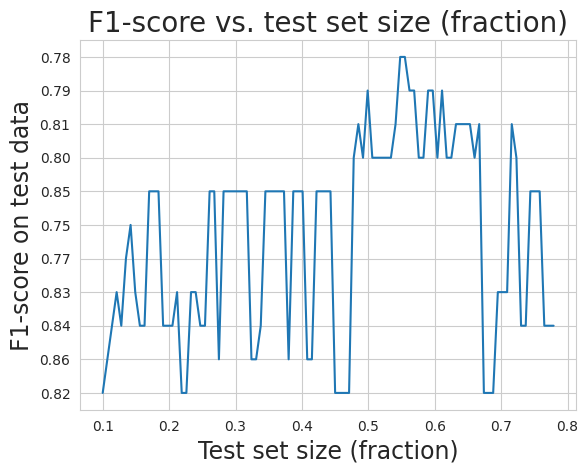

In [54]:
nsimu=101
class_report = [0]*nsimu
f1=[0]*nsimu
test_fraction =[0]*nsimu
for i in range(1,nsimu):
        X_train, X_test, y_train, y_test = train_test_split(train.drop('Pclass',axis=1),
                                                    train['Pclass'], test_size=0.1+(i-1)*0.007,
                                                    random_state=111)
        logmodel =(LogisticRegression(C=1,tol=1e-4, max_iter=1000,n_jobs=4))
        logmodel.fit(X_train,y_train)
        predictions = logmodel.predict(X_test)
        class_report[i] = classification_report(y_test,predictions)
        l=class_report[i].split()
        f1[i] = l[len(l)-2]
        test_fraction[i]=0.1+(i-1)*0.007

plt.plot(test_fraction[1:len(test_fraction)-2],f1[1:len(f1)-2])
plt.title("F1-score vs. test set size (fraction)",fontsize=20)
plt.xlabel("Test set size (fraction)",fontsize=17)
plt.ylabel("F1-score on test data",fontsize=17)
plt.show()

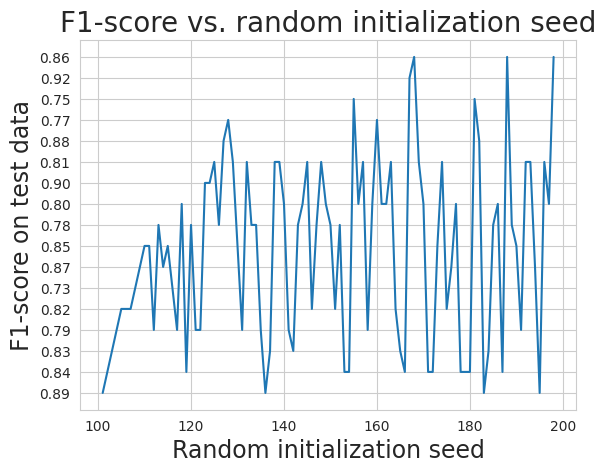

In [55]:
nsimu=101
class_report = [0]*nsimu
f1=[0]*nsimu
random_init =[0]*nsimu
for i in range(1,nsimu):
        X_train, X_test, y_train, y_test = train_test_split(train.drop('Pclass',axis=1),
                                                    train['Pclass'], test_size=0.3,
                                                    random_state=i+100)
        logmodel =(LogisticRegression(C=1,tol=1e-5, max_iter=1000,n_jobs=4))
        logmodel.fit(X_train,y_train)
        predictions = logmodel.predict(X_test)
        class_report[i] = classification_report(y_test,predictions)
        l=class_report[i].split()
        f1[i] = l[len(l)-2]
        random_init[i]=i+100

plt.plot(random_init[1:len(random_init)-2],f1[1:len(f1)-2])
plt.title("F1-score vs. random initialization seed",fontsize=20)
plt.xlabel("Random initialization seed",fontsize=17)
plt.ylabel("F1-score on test data",fontsize=17)
plt.show()